30


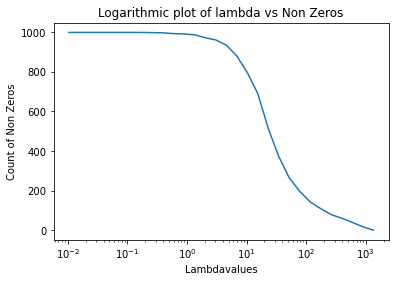

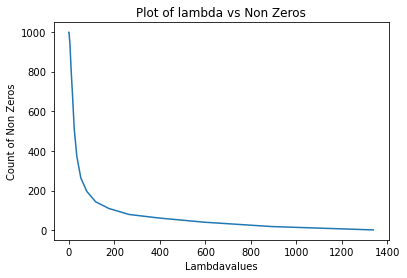

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 500
d=1000
k = 100
sum=0
count=0
count1=[]
lambda1=[]

#initializing X and noise
X = np.random.standard_normal(size=(n,d))
noise=np.random.standard_normal(size=n)

#initializing Wtrue
W=np.zeros(d)
for j in range(1,k+1):
    if j<k+1:
        W[j-1]=j/k
    else:
        W[j-1] = 0      
y=np.dot(X,(W.T))+ noise
lambdaa= np.zeros([d])

#for calculation of Y
for j in range(n):
    sum=sum+y[j]
sum=sum/n

#for claculation of lambdamax
for k in range(100):
    lam=0
    for i in range(500):
        lam=2*X[i][k]*(y[i]-sum)+lam
    lambdaa[k]=np.linalg.norm(lam)
lambdamax=np.max(lambdaa)

#lambda loop 
while lambdamax>0.01:
    ak=np.zeros(d)
    b=np.zeros(n)
    ck=np.zeros(d)
    Wtemp=np.zeros(d)
    check=np.zeros(d)
    epsilon=np.zeros(d)
    W=np.zeros(d)
    count=0
    converged=False
    #convergence loop
    while not converged:
        b=np.sum(y-np.dot(X,W.T))
        b=b/n
        check[:]=W
        #looping over each and every column
        for k in range(1000):
            Xk=X[:,k]
            Xj=np.delete(X,k, axis=1)
            Wj=np.delete(W,k,axis=0)
            ak=2*np.sum(np.square(Xk))
            ck=2*np.sum(np.dot(Xk.T,(y-(b+np.dot(Xj,Wj.T)))))  
            if ck<-lambdamax:
                W[k]=(ck+lambdamax)/ak
            elif ck >= -lambdamax and ck <= lambdamax:
                W[k]=0
            else:
                W[k]=(ck-lambdamax)/ak 
                
        #storing the values of difference in epsilon to check the convergence 
        epsilon=np.absolute(np.array(W) - np.array(check))
        converged=True    # making the converged true by default if condition is not satisfying
        
        #checking the converged
        for i in range(d):
            if epsilon[i]>0.1:
                converged=False
                break  
        
    #counting the number of non zeros
    for i in range(1,d):
        if W[i]!=0:
            count=count+1
    
    count1.append(count)         #appending the values
    lambda1.append(lambdamax)    #appedning the lambdavalues
    lambdamax=lambdamax/1.5

lambda2=lambda1[1:]

fig1=plt.figure("logarithmic plot")
plt.xlabel('Lambdavalues')
plt.ylabel('Count of Non Zeros')
plt.semilogx(lambda1,count1)
plt.title("Logarithmic plot of lambda vs Non Zeros")

fig2=plt.figure("Normal plot")
plt.xlabel('Lambdavalues')
plt.ylabel('Count of Non Zeros')
plt.plot(lambda1,count1)
plt.title("Plot of lambda vs Non Zeros")
plt.show()